In [1]:
#Some import Important Library
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/My Drive/Restaurant_Reviews.csv")

#Exploring the Data 

In [3]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df.shape

(1000, 2)

In [5]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [6]:
df.mean()

Liked    0.5
dtype: float64

In [7]:
df.median()

Liked    0.5
dtype: float64

In [8]:
df.dtypes

Review    object
Liked      int64
dtype: object

In [9]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [10]:
df.columns

Index(['Review', 'Liked'], dtype='object')

#Data Preprocessing

In [11]:
#Importing essential libraries for performing natural language processing using 'Restaurant_Reviews.csv' data set
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
#Cleaning the Review Column
corpus = []
for i in range(0,1000):
  #Cleaning Special Char from the Review Column
  review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = df['Review'][i])
  #Converting the entire review column into the lower case
  review = review.lower()
  #Tokenizing the review of words
  review_words = review.split()
  #Removing the Stopwords
  review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
  #Stemming the Words
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review_words]
  #Joining the Stem Words
  review=' '.join(review)
  #Creating a corpus
  corpus.append(review)

In [13]:
corpus[0:15]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair']

In [14]:
#Creating the Bag of Words (BoW)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

#Spliting the Data set

In [15]:
from sklearn.model_selection import train_test_split
training_x,test_x,training_y,test_y = train_test_split(X,y,test_size=0.2,random_state=0)

#Model Building

In [16]:
#Multinomial Classifier 
from sklearn.naive_bayes import MultinomialNB

In [17]:
mnb = MultinomialNB()
mnb.fit(training_x,training_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
y_pred = mnb.predict(test_x)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(test_y,y_pred)

0.765

              precision    recall  f1-score   support

           0       0.77      0.74      0.75        97
           1       0.76      0.79      0.78       103

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200

###################################################
Accuracy Score of Random Forest Model


0.765

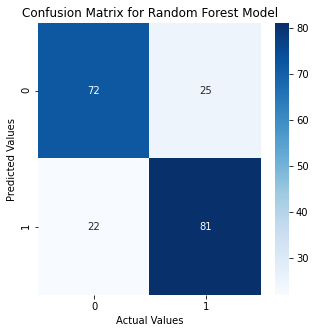

In [21]:
print(classification_report(test_y,y_pred))
print("###################################################")
#Confusion Matrix of Random Forest Model
cm = confusion_matrix(test_y,y_pred)
plt.figure(figsize=(5,5))
g = sns.heatmap(data=cm, annot=True, cmap='Blues')
p = plt.xlabel("Actual Values")
p = plt.ylabel("Predicted Values")
p = plt.title("Confusion Matrix for Random Forest Model")
print("Accuracy Score of Random Forest Model")
from sklearn.metrics import accuracy_score
accuracy_score(test_y,y_pred)

#Prediction

In [22]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)
  temp = cv.transform([final_review]).toarray()
  return mnb.predict(temp)

In [23]:
#Predicting values
sample_review = 'The food is really good here'
if predict_sentiment(sample_review):
  print("This is a Positive Review")
else:
  print("This is a Negative Review")


This is a Positive Review


In [24]:
#Predicting values
sample_review = 'Food was pretty bad and the service was very slow.'
if predict_sentiment(sample_review):
  print("This is a Positive Review")
else:
  print("This is a Negative Review")

This is a Negative Review


In [25]:
#Predicting the Values
sample_review = 'Breakfast is good but Launch is bad'
if predict_sentiment(sample_review):
  print("This is Positive Review ")
else:
  print("This is a Negative Review")

This is a Negative Review


In [26]:
sample_review = 'Wow... Loved this place.'
if predict_sentiment(sample_review):
  print("This is a Positive Review")
else:
  print("This is a Negative Review")

This is a Positive Review
